# Assignment #3.
I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name:Priestley

CWID:20008622

Date:11/19/2022

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks.

For all the programming homeworks, you should submit a report as a Jupyter notebook organized by questions, with the proper explanation for every answer, and saved as 1). an HTML or pdf file. It might be easier to generate an HTML file than a pdf file. 2). Notebook file with the extension .ipynb. From the file menu of the Jupyter notebook, you can download the PDF or HTML and ipynb files as: File --> Download as:

If you want to improve your homework, you can resubmit it until the deadline.

1 point for every item of every question. Total = 20

# Question 1
You have to build a predictive model for targeting offers to consumers, and conduct some model performance analytics on the result.

- class: A factor with levels CH and MM indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice
- WeekofPurchase: Week of purchase
- StoreID: Store ID
- PriceCH: Price charged for CH
- PriceMM: Price charged for MM
- DiscCH: Discount offered for CH
- DiscMM: Discount offered for MM
- SpecialCH: Indicator of special on CH
- SpecialMM: Indicator of special on MM
- LoyalCH: Customer brand loyalty for CH
- SalePriceMM: Sale price for MM
- SalePriceCH: Sale price for CH
- PriceDiff: Sale price of MM less sale price of CH
- Store7: A factor with levels No and Yes indicating whether the sale is at Store 7
- PctDiscMM: Percentage discount for MM
- PctDiscCH: Percentage discount for CH
- ListPriceDiff: List price of MM less list price of CH
- STORE: Which of 5 possible stores the sale occured at

We will use historical data on past customer responses (contained in the file marketing1.csv) in order to build a classification model to forecast the customers' decision to purchase Citrus Hill or Minute Maid. 

(a) You must randomly split your data set using 70% and 30% of the observations for the training and test data set respectively.

Fit a tree to the training data, with "class" as the response and the other variables as predictors.What is the training error rate? How many terminal nodes does the tree have?

# Note: BTC is not mentioned to be dropped. Thus, retaining BTC

In [71]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install graphviz
!pip install pydot

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

#Loading the csv file
df_main = pd.read_csv('marketing1.csv') 
df_main.head(10)

#Checking the data
#df_main.info()
df_main.head(20)

print(df_main.head(20))

#Processing the data
for i in range(0,df_main.shape[0]):
    if df_main['Store7'][i] == 'Yes': 
        df_main['Store7'].iloc[i] = 1
    else: 
        df_main['Store7'].iloc[i] = 0

print(df_main['class'])


df_main['class'] = df_main['class'].map({'CH':0, 'MM':1})
#df_main.info()
df_main.head(20)

#Definig the dependent and independent variables
X = df_main.drop(['class'], axis = 1)
y = df_main['class']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

## Decision tree model definition 
decision_tree = DecisionTreeClassifier(criterion="entropy")   # Look at those 2 arguments !!! 

# Fitting the model and finding score
model_main = decision_tree.fit(X_train, y_train)
score = model_main.score(X_train,y_train)

#Finding training error
error = 1-score
n_nodes = model_main.tree_.node_count

#Printing results
print('Total nodes formed: ', n_nodes)
print("The training error rate is: ",error)




   class  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0     CH             237        1     1.75     1.99    0.00    0.00   
1     CH             239        1     1.75     1.99    0.00    0.30   
2     CH             245        1     1.86     2.09    0.17    0.00   
3     MM             227        1     1.69     1.69    0.00    0.00   
4     CH             228        7     1.69     1.69    0.00    0.00   
5     CH             230        7     1.69     1.99    0.00    0.00   
6     CH             232        7     1.69     1.99    0.00    0.40   
7     CH             234        7     1.75     1.99    0.00    0.40   
8     CH             235        7     1.75     1.99    0.00    0.40   
9     CH             238        7     1.75     1.99    0.00    0.40   
10    CH             240        7     1.86     2.09    0.00    0.00   
11    CH             263        7     1.86     2.13    0.27    0.00   
12    CH             276        7     1.99     2.13    0.00    0.54   
13    

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(b)  Create a plot of the tree, and interpret the results.

./Images/tree.dot
./Images/tree.png


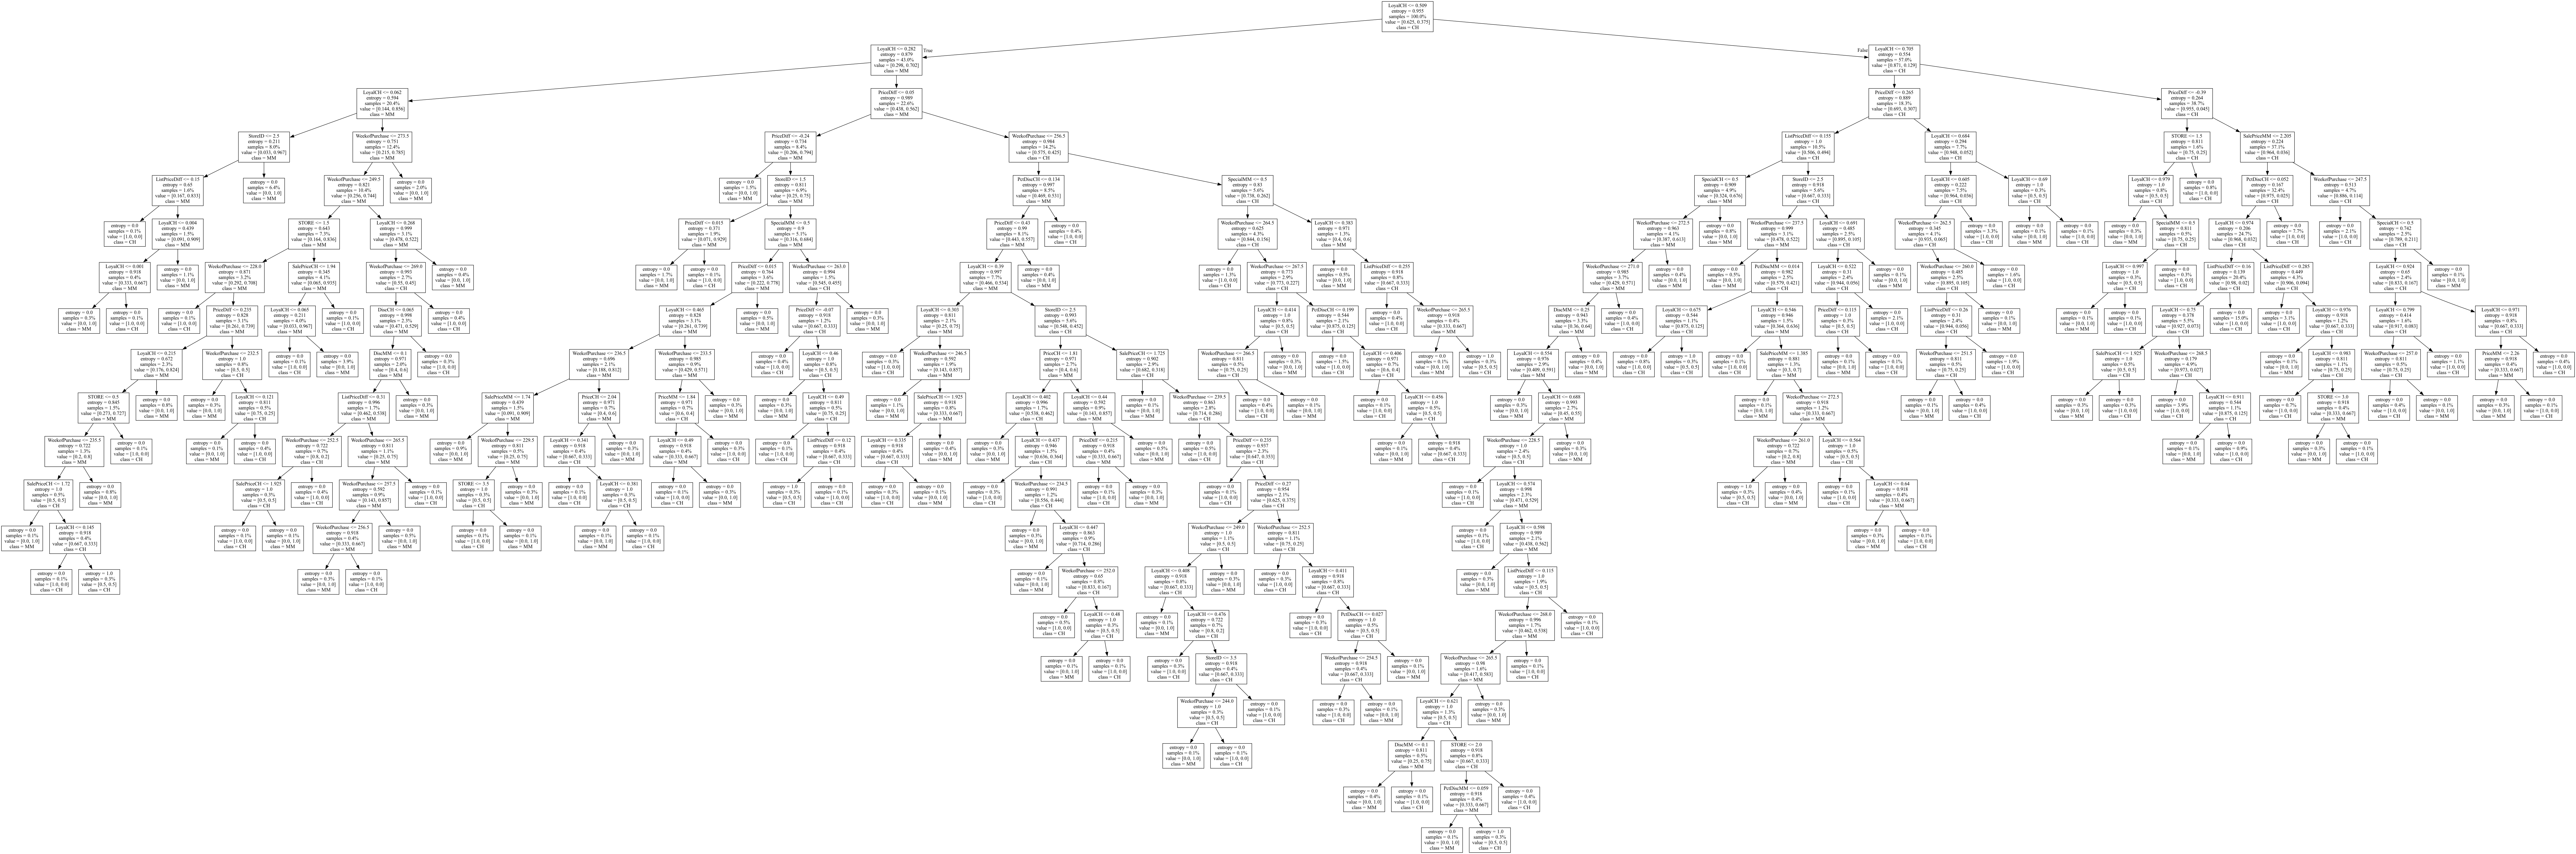

In [5]:
import os
from IPython.display import Image
from sklearn.tree import export_graphviz

#Defining the tree to visualize

def visualize_tree(decision_tree, feature_names, class_names, directory="./Images", name="tree",proportion=True):
    
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    print(dot_name)
    
    #Using this to fix the path issue for accessing the dot command
    os.environ["PATH"] += ':'+ 'usr/local/bin'
  
    #Creating a dot file of the decision tree using export_graphviz function
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    
    #Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    print(image_name)
    
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

visualize_tree(decision_tree, X_train.columns, ["CH", "MM"])


Total nodes formed:  85
The training error for this model with max_dpeth of 6 is:  0.12550066755674227
The number of terminal nodes for this this case are 43(Terminal nodes are the end nodes which cannot be split into more decision nodes
./Images/tree.dot
./Images/tree.png


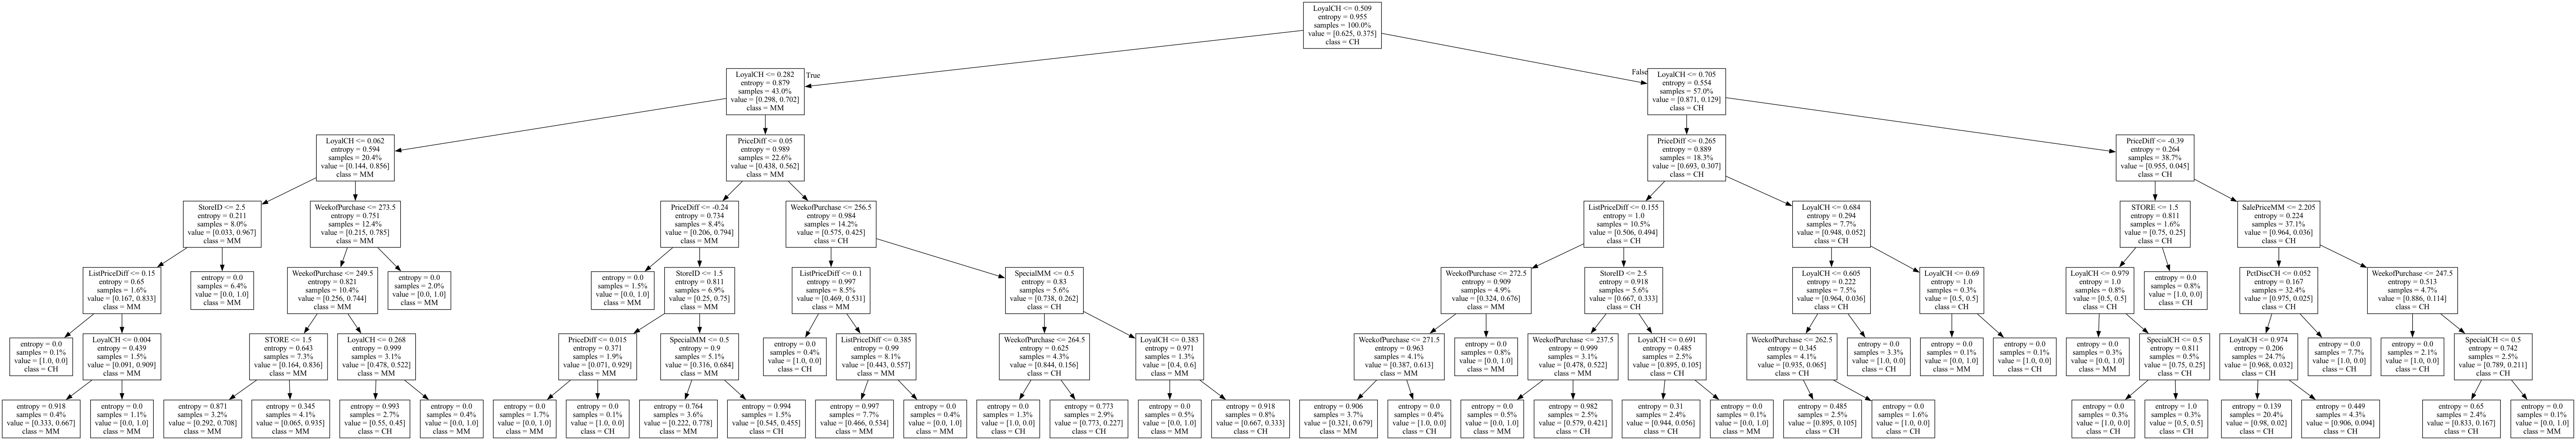

In [8]:
## Decision tree model definition 
decision_tree = DecisionTreeClassifier(max_depth = 6, criterion="entropy")   # Look at those 2 arguments !!! 
#
# Fitting the model and finding score
model = decision_tree.fit(X_train, y_train)
score = model.score(X_train,y_train)

#Finding training error
error1 = 1- score
n_nodes = model.tree_.node_count

#Printing results
print('Total nodes formed: ', n_nodes)
print("The training error for this model with max_dpeth of 6 is: ",error1)
print('The number of terminal nodes for this this case are 43(Terminal nodes are the end nodes which cannot be split into more decision nodes')

visualize_tree(decision_tree, X_train.columns, ["CH", "MM"])


# Results interpretation


# Complete unpruned data
In this model, I have given a maximum depth to allow it to grow till convergence (entropy becomes least). There are around 19 layers which is the attained depth here. As the tree was allowed to attain maximum depth possiible, the entropy at the end of each leaf or terminal node is zero in most cases. The feature LoyalCH forms the one with highest importance and thus is the first node selected for classification since it can account for and eliminate entropy to a large extent initially.
The results indicate that the most important feature which has the ability to account for a majority of classification is LoyalCH. 


# Unpruned data : max depth = 6
For simplication in interpretation, selecting a maximum depth of 6. The results show that LoyalCH was the forst node of split with condition (<=0.509). It was furthet split again based on LoyalCH and then PriceDiff. For each decision node the split led to different decision nodes based on entropy. For right hand classifier nodes, for store ID >2.5, class was identfied as MM. As we can see the entropy atained was 0 meaning no furher split required. The end terminal nodes show that not all data is identified completely since the entropy is still present. This indicates that the process can continue further by increasing the depth. The training error is 0.12 which is further reduced to almost 0.0009 if allowed to continue till convergence. With increase in depth, the complexity increases. The ones which are assigned a class with zero entropy have a significant proportion of samples still present. For e.g . at the botton left, for LoyalCH>0.004, class is MM with samples = 1.1% and entropy = 0.




(c) Pick one of the terminal nodes, and interpret the information displayed.

# Interpretation of a terminal node

As discussed in the earlier question, the dof of 6 is chosen for simplification in interpratation. Thus, choosing the terminal node corresponding to first and the leftmost node classified as CH. The decision rule for this node can be traced back as follows: LoyalCH<= 0.509 --> LoyalCH<= 0.282 --> LoyalCH<= 0.062 --> StoreID<= 2.5 --> ListPriceDiff <= 0.15 ---> Class CH. 



(d) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [9]:
#Presenting the confusion matrix

pred = model_main.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

#Finding the testing error
score_test = model_main.score(X_test,y_test)
print(score_test)
error_score = 1 - score_test
print('The training error for max depth to convergence: ',error_score)


#Presenting the confusion matrix

pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

#Finding the testing error
score_test = model.score(X_test,y_test)
print(score_test)
error_score = 1 - score_test
print('The training error for max depth of 6: ',error_score)


      No  Yes
No   150   41
Yes   35   95
0.7632398753894081
The training error for max depth to convergence:  0.23676012461059193
      No  Yes
No   145   43
Yes   40   93
0.7414330218068536
The training error for max depth of 6:  0.25856697819314645


# The test results are as above

(e) Using the training set, run 10-fold cross-validation to determine the optimal tree size.

In [11]:
#Running the 10 fold cross validation
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Decision tree model definition 
decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy")   # Look at those 2 arguments !!! 

# Fitting the model
model = decision_tree.fit(X_train, y_train)

#Decision tree score 
decision_tree.score(X_train, y_train)

#Setting up the cross validation KFOLD function
crossvalidation = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

#Calculation scores using cross validation
scores = cross_val_score(model, X_test, y_test, cv=crossvalidation,n_jobs=-1)
error = scores - 1
#Printing result
print("Folds: " + str(len(scores)) + ", ERROR: " + str(np.mean(np.abs(error))) + ", STD: " + str(np.std(scores)))





Folds: 10, ERROR: 0.2212121212121212, STD: 0.05133274580626892


(f) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

Max Depth: 1, ERROR: 0.20852272727272725, STD: 0.06768521802926708
Max Depth: 2, ERROR: 0.21477272727272725, STD: 0.06833788955448017
Max Depth: 3, ERROR: 0.2024621212121212, STD: 0.056187790822077754
Max Depth: 4, ERROR: 0.2149621212121212, STD: 0.05837820489842536
Max Depth: 5, ERROR: 0.22424242424242422, STD: 0.05345943790742108
Max Depth: 6, ERROR: 0.2180871212121212, STD: 0.057656458220972755
Max Depth: 7, ERROR: 0.2023674242424242, STD: 0.0639103527371229
Max Depth: 8, ERROR: 0.21477272727272725, STD: 0.06541744529374661
Max Depth: 9, ERROR: 0.21486742424242422, STD: 0.0628269256045755


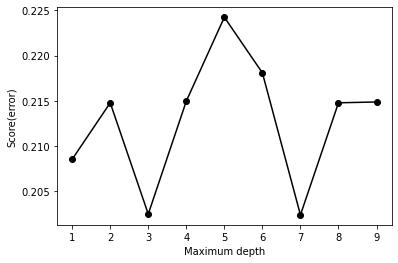

In [12]:
#Plotting results test error  -- Just for the pupose of analysis

#Initiating a dictionary to store scores for max depth and scores
plot1 ={}

#Running a loop for trying out different levels of max_depth
for i in range(1,10):
    # Decision tree model definition 
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")   # Look at those 2 arguments !!! 
    
    # Fitting the model
    model = decision_tree.fit(X_train, y_train)
    decision_tree.score(X_train, y_train)
    
    crossvalidation = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    
    scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10,n_jobs=-1)
    error = 1-scores
    
    print("Max Depth: " + str(i) + ", ERROR: " + str(np.mean(np.abs(error))) + ", STD: " + str(np.std(scores)))
    
    #Storing results in dictionary 
    plot1[i]=np.mean(np.abs(error))
    
#Plotting results 
plt.plot(plot1.keys(),plot1.values(),color = 'black', marker='o')
plt.xlabel('Maximum depth')
plt.ylabel('Score(error)')
plt.show()


Max Depth: 1, ERROR: 0.22958558558558556, STD: 0.060870923908591966
Max Depth: 2, ERROR: 0.21625225225225223, STD: 0.04672373289157696
Max Depth: 3, ERROR: 0.21084684684684682, STD: 0.054982642559945824
Max Depth: 4, ERROR: 0.20282882882882883, STD: 0.049189918484512124
Max Depth: 5, ERROR: 0.21619819819819824, STD: 0.04001642792270298
Max Depth: 6, ERROR: 0.2202342342342342, STD: 0.04201545663078281
Max Depth: 7, ERROR: 0.20954954954954955, STD: 0.039310426529844275
Max Depth: 8, ERROR: 0.2243063063063063, STD: 0.025206485960999614
Max Depth: 9, ERROR: 0.2016036036036036, STD: 0.044800087104394336


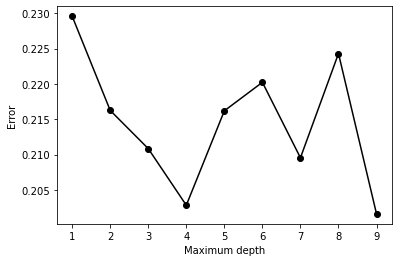

In [13]:
#Plotting results train error

#Initiating a dictionary to store scores for max depth and scores
plot1 ={}

#Running a loop for trying out different levels of max_depth
for i in range(1,10):
    # Decision tree model definition 
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")   # Look at those 2 arguments !!! 
    
    # Fitting the model
    model = decision_tree.fit(X_train, y_train)
    decision_tree.score(X_train, y_train)
    
    crossvalidation = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=crossvalidation ,n_jobs=-1)
    error = 1 - scores
    
    print("Max Depth: " + str(i) + ", ERROR: " + str(np.mean(np.abs(error))) + ", STD: " + str(np.std(error)))
    
    #Storing results in dictionary 
    plot1[i]=np.mean(np.abs(error))
    
#Plotting results 
plt.plot(plot1.keys(),plot1.values(),color = 'black', marker='o')
plt.xlabel('Maximum depth')
plt.ylabel('Error')
plt.show()


(g) Which tree size corresponds to the lowest cross-validated classification error rate?

# The tree size of 4 corresponds to the lowest error rate of 0.2028. 
# Here tree size of 3 too can be used since in both test and train error it shows a
# low error rate

# Note: The pruning here is done based on minimizing the error rate of classification since the motive is to get the tree with least error rate of classification. The above plot indicates optimal max depth to achieve pruning.

# Note: StratifiedKFold is used here since its a classification problem. To preserve the proportion of samples in each class this method is preferred. The documentatioin was refered for this problem.

(h) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to a selection of a pruned tree, then create a pruned tree with five terminal nodes.

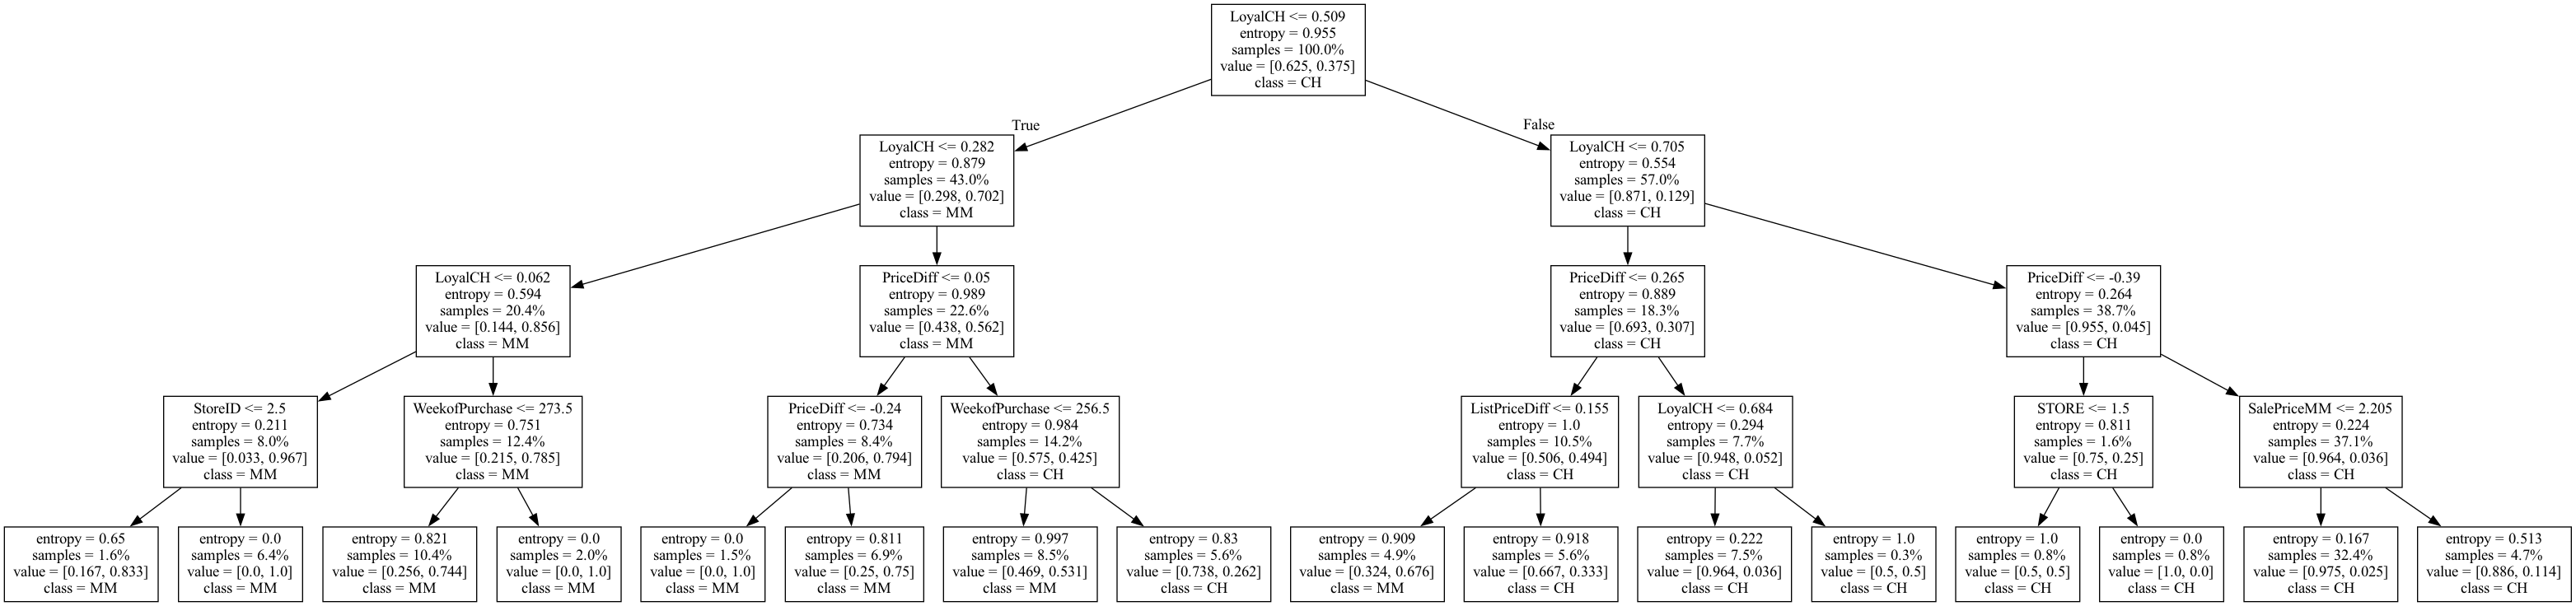

In [14]:
# Decision tree model definition for max depth = 4
decision_tree_3 = DecisionTreeClassifier(max_depth=4, criterion="entropy")   # Look at those 2 arguments !!! 

# Fitting the model
decision_tree_3.fit(X_train, y_train)
decision_tree_3.score(X_train, y_train)

#Plotting the tree and visualizing the results 
import os
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

visualize_tree(decision_tree_3, X_train.columns, ["CH", "MM"])

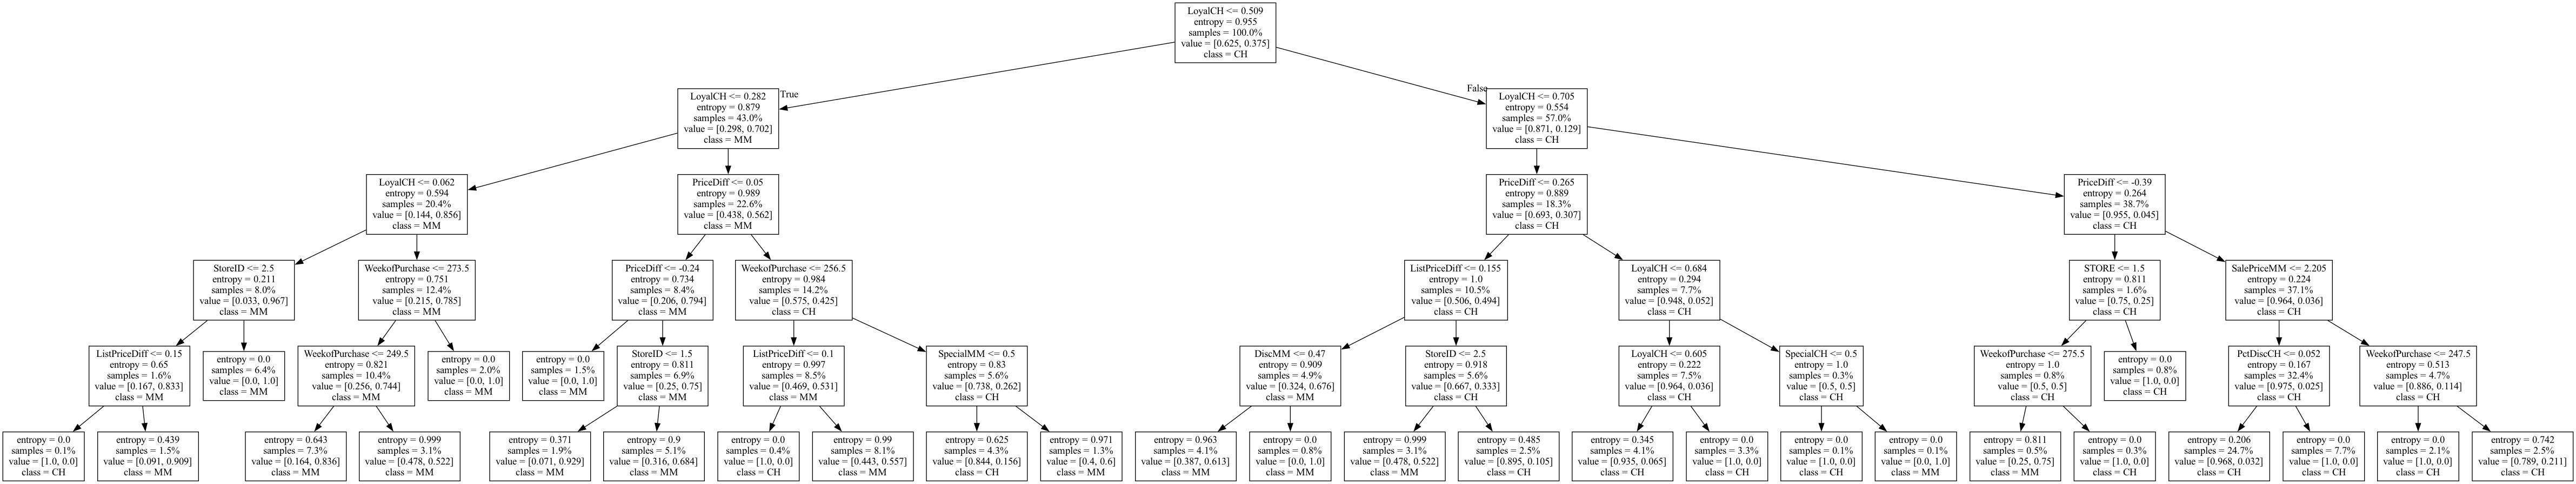

In [15]:
#Decision tree model definition for max depth = 5 -- --for the purpose of analysis

decision_tree_5 = DecisionTreeClassifier(max_depth=5, criterion="entropy")   # Look at those 2 arguments !!! 

# Fitting the model
decision_tree_5.fit(X_train, y_train)
decision_tree_5.score(X_train, y_train)

#Plotting the tree and visualizing the results 
import os
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

visualize_tree(decision_tree_5, X_train.columns, ["CH", "MM"])




# Cross validation is able to give an optimal tree size of four. The plot for max depth of 4 is plotted 2 figures above. 



(i) Compare the training and test error rates between the pruned and unpruned trees. Which is higher?

# Comparison between test error rates between pruned and unpruned trees 


Max Depth: 1, ERROR: 0.20852272727272725, STD: 0.06768521802926708
Max Depth: 2, ERROR: 0.21477272727272725, STD: 0.06833788955448017
Max Depth: 3, ERROR: 0.2024621212121212, STD: 0.056187790822077754
Max Depth: 4, ERROR: 0.2149621212121212, STD: 0.05837820489842536
Max Depth: 5, ERROR: 0.22424242424242422, STD: 0.06348059940940548
Max Depth: 6, ERROR: 0.2149621212121212, STD: 0.06319772390808497
Max Depth: 7, ERROR: 0.19611742424242423, STD: 0.07987334342578739
Max Depth: 8, ERROR: 0.21477272727272725, STD: 0.06689360693489574
Max Depth: 9, ERROR: 0.22102272727272726, STD: 0.06399049193318676


This result created in questions above show that test error is the least for max depth of 7. For all the unpruned trees with higher and complex structures it is higher compared to the one at max depth 7. Thus pruned tree, found for max depth of 4 has higher test error compared to many other trees of different depths. 


Max Depth: 1, ERROR: 0.22958558558558556, STD: 0.060870923908591966
Max Depth: 2, ERROR: 0.21625225225225223, STD: 0.04672373289157696
Max Depth: 3, ERROR: 0.21084684684684682, STD: 0.054982642559945824
Max Depth: 4, ERROR: 0.20282882882882883, STD: 0.049189918484512124
Max Depth: 5, ERROR: 0.21486486486486484, STD: 0.038506258207079785
Max Depth: 6, ERROR: 0.21756756756756754, STD: 0.043608014816700284
Max Depth: 7, ERROR: 0.20954954954954955, STD: 0.040204735356290995
Max Depth: 8, ERROR: 0.2202882882882883, STD: 0.023219094935265173
Max Depth: 9, ERROR: 0.20425225225225224, STD: 0.040800941471160215


This result created in questions above show that train error is the least for max depth of 4. For all the unpruned trees with higher and complex structures it is higher compared to the one at max depth 4 which is the pruned tree.


# Question 2
You have to predict the daily return of the bitcoin for the next period. The file BTCreturns.csv includes the following variables:

Daily return based on adjusted daily closing prices:
Core ETFs that represent complete market:
VTI: Vanguard Total Stock Market ETF return
VXUS: Vanguard Total International Stock ETF return
BND: Vanguard Total Bond Market ETF return
BNDX: Vanguard Total International Bond ETF return

Investment style:
VUG Vanguard Growth ETF  return
VTV Vanguard Value ETF return

Sectors: Technology (growth) and energy (value)
QQQ Invesco Nasdaq return
XLE Energy ETF return

Cryptocurrencies:
ETH Ethereum return
ETH_V Ethereum trading volume
BTC Bitcoin return
BTC_V Bitcoin trading volume


Additional market factors from the 5 Fama French factors model:
RM-Rf : market return minus risk free rate (market risk premium)
SMB: Small Minus Big (firm size): difference of average return on 9 small and 9 big stock portfolios
HML: High Minus Low (value): difference of average return on 2 value and 2 growth portfolios 
RMW (Robust Minus Weak):  difference of average return on 2 robust and 2 weak operating profitability portfolios 
CMA (Conservative Minus Aggressive):  difference of average return on 2 conservative and 2 aggressive investment portfolios

(a) Generate a new variable BTC1 which is the BTC return of the next day. Make sure that you sort the dataset according to "date." After sorting, you can remove "date" from your data set.

Split your data set into 70% and 30%  training and testing datasets respectively.

Perform boosting on the training set with 1,000 trees with different levels of regularization via shrinkage. Hint: use the GradientBoostingRegressor function and its learning_rate parameter of the sklearn package to apply boosting to a regression problem with regularization.
See https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html

In [27]:
#Creating a dictionary for final results 
result_dict = {}

#Loading the csv file
df_main1 = pd.read_csv('BTCreturns.csv') #.drop('Unnamed: 0', axis=1)

#Checking the data
print(df_main1.info())
print(df_main1.head())

#Converting date into date format
df_main1['Date'] = pd.to_datetime(df_main1['Date'])

#Preprocessing the data for use by sorting by Date 
df_main1 = df_main1.sort_values('Date')

#Checking the data
print(df_main1.head())

#Initializing a new column 'BTC1'
df_main1['BTC1'] = 0

#Creating a new column which take the input as previous days BTC prics
#df_main1['BTC1'][0:len(df_main1['BTC'])-1] = list([df_main1['BTC'][i+1] for i in range(0,len(df_main1['BTC'])-1)])
df_main1['BTC1'] = df_main1['BTC'].shift(periods = -1)
df_main1 = df_main1.dropna()

print(X.head(5))

print(df_main1.shape)
y = df_main1['BTC1']
X = df_main1.drop(['Date','BTC1'], axis = 1)

print(y.head(5))
print(X.head(5))

#Splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

print(X_train.head())
print(X_test.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1544 non-null   object 
 1   VTI     1544 non-null   float64
 2   VXUS    1544 non-null   float64
 3   BND     1544 non-null   float64
 4   BNDX    1544 non-null   float64
 5   VUG     1544 non-null   float64
 6   VTV     1544 non-null   float64
 7   QQQ     1544 non-null   float64
 8   XLE     1544 non-null   float64
 9   RM-Rf   1544 non-null   float64
 10  SMB     1544 non-null   float64
 11  HML     1544 non-null   float64
 12  RMW     1544 non-null   float64
 13  CMA     1544 non-null   float64
 14  ETH     1544 non-null   float64
 15  ETH_V   1544 non-null   int64  
 16  BTC     1544 non-null   float64
 17  BTC_V   1544 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 217.2+ KB
None
        Date       VTI      VXUS       BND      BNDX       VUG       VTV  \
0  8/10

In [28]:
#Applying gradient boosting
q2_dict = {}
for i in range(1,20):
    #Defining the model
    boosted_model = GradientBoostingRegressor(n_estimators = 1000, 
                                               learning_rate = 0.00001,
                                               max_depth = i,
                                               random_state = 1)
    
    
    #Fitting the model
    boosted_model.fit(X_train, y_train)
    #Calculating the mean squared error
    mse_1 = mean_squared_error(y_test, boosted_model.predict(X_test))
    
    q2_dict[i]=mse_1
    
    #print('The MSE for gradient boosting model is: ',mse_1)
    
    #Storing the result 
    #result_dict['Gradient Boosting'] = mse_1
print(q2_dict)
optimal_depth_df = pd.DataFrame({'Depth':q2_dict.keys(),'MSE':q2_dict.values()})
optimal_depth_df

{1: 26.900089152701298, 2: 26.90287312076207, 3: 26.902948848545016, 4: 26.893884924067926, 5: 26.894129420217418, 6: 26.900369291676924, 7: 26.900953426127224, 8: 26.91093103554466, 9: 26.9050885024222, 10: 26.906102532573097, 11: 26.903963822322186, 12: 26.89696253284176, 13: 26.884221184368116, 14: 26.892066698124907, 15: 26.893671344584824, 16: 26.886288055034154, 17: 26.88797866278133, 18: 26.890548039807264, 19: 26.890253753932914}


,Depth,MSE
0,1,26.900089
1,2,26.902873
2,3,26.902949
3,4,26.893885
4,5,26.894129
5,6,26.900369
6,7,26.900953
7,8,26.910931
8,9,26.905089
9,10,26.906103


In [31]:
#Applying gradient boosting


#Defining the model
boosted_model = GradientBoostingRegressor(n_estimators = 1000, 
                                           learning_rate = 0.01,
                                           max_depth = 4,
                                           random_state = 1)


#Fitting the model
boosted_model.fit(X_train, y_train)
#Calculating the mean squared error
mse_1 = mean_squared_error(y_test, boosted_model.predict(X_test))

q2_dict[i]=mse_1

print('The MSE for gradient boosting model is: ',mse_1)



The MSE for gradient boosting model is:  28.705228183739408


In [32]:
#Applying gradient boosting


#Defining the model
boosted_model = GradientBoostingRegressor(n_estimators = 1000, 
                                           learning_rate = 0.01,
                                           random_state = 1)


#Fitting the model
boosted_model.fit(X_train, y_train)
#Calculating the mean squared error
mse_1 = mean_squared_error(y_test, boosted_model.predict(X_test))

q2_dict[i]=mse_1

print('The MSE for gradient boosting model is: ',mse_1)

result_dict['Gradient Boosting Best wihout optimal learning rate'] = mse_1

The MSE for gradient boosting model is:  28.679315850194097


# For the purpose of identifying an optimum depth, ran a loop to check for MSE. Thus, selecting max_depth 4 for analysis. Taking into consideration both complexity and mse error, choosing a depth of 3 or 4. Chose 4 to account for some extensive decision rules since the purity of nodes is moreInstead of randomly assigning a value, thought of using this method. If no max depth is taken, till convergence the error rate is as above.

(b) Produce a plot with different values of the learning_rate parameter (different shrinkage values) on the x-axis and the corresponding test set MSE on the y-axis.

# In this scenario, in order to get more precision running subsets of ranges to find an optimal learning rate.

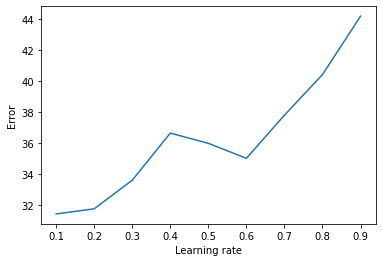

In [34]:
#Plot of learning rate VS mse (Case1 : range 0.1 to 1, step: 0.1)

#Creating a dictionary for storing plot data
plot2 ={}

#Running a loop for apt range of data 
for i in np.arange(0.1,1,0.1):
    

    boosted_model = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, learning_rate = i, random_state = 1)
    
    boosted_model.fit(X_train, y_train)
    mse2 = mean_squared_error(y_test, boosted_model.predict(X_test))
    
    plot2[i]= mse2
    
#Plotting the results
plt.plot(plot2.keys(),plot2.values())
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.show()


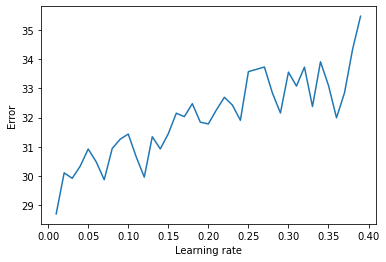

In [35]:
#Plot of learning rate VS mse (Case1 : range 0.01 to 0.4, step: 0.01)

#Creating a dictionary for storing plot data
plot2 ={}

#Running a loop for apt range of data 
for i in np.arange(0.01,0.4,0.01):
    

    boosted_model = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, learning_rate = i, random_state = 1)
    
    boosted_model.fit(X_train, y_train)
    mse2 = mean_squared_error(y_test, boosted_model.predict(X_test))
    
    plot2[i]= mse2
    
#Plotting the results
plt.plot(plot2.keys(),plot2.values())
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.show()


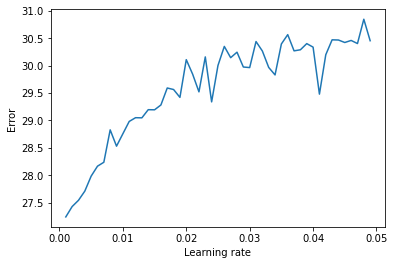

In [37]:
#Plot of learning rate VS mse (Case1 : range 0.001 to 0.05, step: 0.001)

#Creating a dictionary for storing plot data
plot2 ={}

#Running a loop for apt range of data 
for i in np.arange(0.001,0.05,0.001):
    

    boosted_model = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, learning_rate = i, random_state = 1)
    
    boosted_model.fit(X_train, y_train)
    mse2 = mean_squared_error(y_test, boosted_model.predict(X_test))
    
    plot2[i]= mse2
    
#Plotting the results
plt.plot(plot2.keys(),plot2.values())
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.show()


# From the graphs above it is evident that the error rate is the least when learning rate is negligible. Thus, to achieve higher effieciency, using learning rate close to 0 or 0.00001.



(c) Using the best learning_rate, retrain your boosting model with the training dataset. What is the test set MSE for this approach?

# Max depth in this case does not have a significant impact, thus on comparing below, using max_depth of 4.

In [39]:
#Using best learning rate to retrain the model

#Defining the model
boosted_model_final = GradientBoostingRegressor(n_estimators = 1000, 
                                           learning_rate = 0.00001,
                                            max_depth = 4,
                                           random_state = 1)

#Fitting the model
boosted_model_final.fit(X_train, y_train)

mse_2 = mean_squared_error(y_test, boosted_model_final.predict(X_test))
print('The MSE for gradient boosting model using best learnig rate is: ',mse_2)

result_dict['Gradient Boosting Best'] = mse_2



The MSE for gradient boosting model using best learnig rate is:  26.893884924067926


In [40]:
#Using best learning rate to retrain the model

#Defining the model
boosted_boston = GradientBoostingRegressor(n_estimators = 1000, 
                                           learning_rate = 0.00001,
                                           random_state = 1)

#Fitting the model
boosted_boston.fit(X_train, y_train)

mse_2 = mean_squared_error(y_test, boosted_boston.predict(X_test))
print('The MSE for gradient boosting model using best learnig rate is: ',mse_2)

#result_dict['Gradient Boosting Best'] = mse_2



The MSE for gradient boosting model using best learnig rate is:  26.902948848545016


(d) Apply bagging regressor to the training set. What is the test set MSE for this approach? Hint: use BaggingRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

The MSE for bagging model is:  27.569318453124097


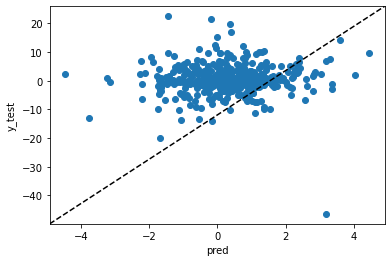

In [67]:
# Bagging

#Defining the model
bagged_model = RandomForestRegressor(max_features = 17, random_state = 1)

#Fitting the model
bagged_model.fit(X_train, y_train)

#Predicting using test data 
pred = bagged_model.predict(X_test)

#Creating a scatter plot for visualization
plt.scatter(pred, 
            y_test)
 
plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mse_3 = mean_squared_error(y_test, bagged_model.predict(X_test))

#Printing the result
print('The MSE for bagging model is: ',mse_3)

result_dict['Bagging Regressor'] = mse_3




# As per the rule, we use m = squareRoot(p) variables as max features when it comes to random forest. Thus, choosing m = 4 (squareRoot(17) ~ 4)
# where m = number of variables used as max features in random forest model
# p = Total number of features available( e.g. used in bagging)

(e) Apply random forest for regression to the training set. What is the test set MSE for this approach? Which variables appear to be the most important predictors in the random forest model? Hint: use RandomForestRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

The MSE for random forest regressor model is:  27.98695190545


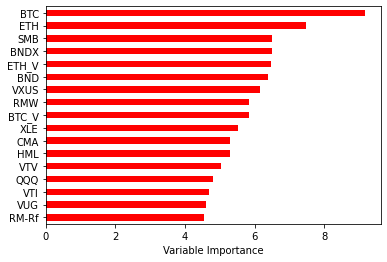

In [46]:
# Random forest 

#Defining the model
random_forest_model = RandomForestRegressor(max_features = 4, random_state = 1)

#Fitting the model
random_forest_model.fit(X_train, y_train)

#Predicting using test data 
pred = random_forest_model.predict(X_test)

#Calculating error
mean_squared_error(y_test, pred)

#Creating a plot for finding important features

#Creating a dataframe
Importance = pd.DataFrame({'Importance':random_forest_model.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

mse_4 = mean_squared_error(y_test, random_forest_model.predict(X_test))

#Printing the result
print('The MSE for random forest regressor model is: ',mse_4)


result_dict['Random Forrest Regressor'] = mse_4

# The graph above represents the importance from top.

(f) Apply support vector regression to the training set. What is the test set MSE for this approach? Hint: use SVR from sklearn. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [57]:
#Support Vector Regression

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Standardizing the data for ease of processing 
scaler = StandardScaler()
X_train_mod = scaler.fit_transform(X_train)

svr_mod = SVR(C=1, kernel='linear')

#Fitting the model
svr_mod.fit(X_train_mod, y_train)

X_test_mod = scaler.fit_transform(X_test)

#Predicting using test data 
predicted = svr_mod.predict(X_test_mod)

#Calculating error
mse_5 = mean_squared_error(y_test,predicted)
print('The MSE for SVR linear model is: ',mse_5)

result_dict['SVR linear'] = mse_5
#plot_svr(svr,X_test, y_test)
#sv = svc.support_vectors_
#plot_svc(svc, X, y)

The MSE for SVR linear model is:  28.062999378678008


(g) Apply support vector regression with a nonlinear kernel of your choice to the training set. What is the test set MSE for this approach?

In [48]:
#Trying the non linear kernels

#Defining the model
svr_mod = SVR(C=1.0, kernel='rbf')
#Fitting the model
svr_mod.fit(X_train, y_train)
#Predicting using test data 
predicted = svr_mod.predict(X_test)
#Calculating error
mse_6 = mean_squared_error(y_test, predicted)
#Printing result
print('The MSE for SVR rbf model is: ',mse_6)

result_dict['SVM non-linear rbf'] = mse_6



The MSE for SVR rbf model is:  27.147400882921175


(h) Perform recursive feature elimination with cross-validation to identify a satisfactory model that uses just a subset of the predictors (if your approach suggests using all of the predictors, then follow your results and use them all). Hint: use SVR and feature_selection.RFECV from sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

[False False  True False  True False  True  True  True False False False
 False False  True  True  True]
[ 2  3  1  8  1  5  1  1  1  9  4  6 10  7  1  1  1]


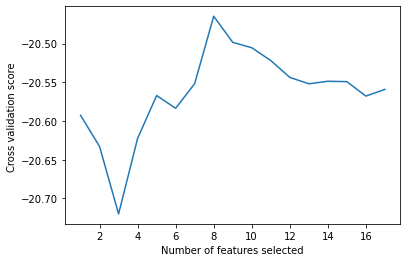

Optimal number of features : 8


,Features,Rank
8,RM-Rf,1
14,ETH_V,1
15,BTC,1
7,XLE,1
6,QQQ,1
16,BTC_V,1
4,VUG,1
2,BND,1
0,VTI,2
1,VXUS,3


In [49]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_mod = scaler.fit_transform(X_train)

svr = SVR(C=1, kernel = 'linear') 
rfecv = RFECV(estimator = svr,min_features_to_select = 1,cv=5,step=1,scoring='neg_mean_squared_error' )


svr_res = rfecv.fit(X_train_mod,y_train)  


##mask of selected features
print(svr_res.support_)
#
# Ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
print(svr_res.ranking_)
#
min_features_to_select =1

## Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ")
plt.plot(range(min_features_to_select, len(svr_res.grid_scores_) + min_features_to_select),svr_res.grid_scores_)
plt.show()
print("Optimal number of features : %d" % svr_res.n_features_)

#Creating a dataframe for important features

col_list = list(X.columns)
pd_imp_features = pd.DataFrame({'Features':col_list,'Rank':list(svr_res.ranking_)})
pd_imp_features.sort_values('Rank')



# The optimal number of features as mentioned are 8. This can be oberved as above. The table created can highlight the first eight important features which can help achieve a satifactory model. From the graph above it can be also noticed that after 8 features, the error rate change is constant. Thus, 8 factors is an optimal solution. 

(i) Apply a linear regression with splines of at least 3 degrees of freedom of the most important feature to the training set. What is the test set MSE for this approach? What is the relevant nonlinear variable?
Hint: use dmatrix from patsy to generate the splines.

In [52]:
from patsy import dmatrix

#Finding the quantiles
quantiles = X_train['BTC'].quantile([0.25,0.5,0.75])


#Running loop for varying degree of freedom
for i in range(3,20):
    
    
    print('Result for degree of freedom: ',i)
    transformed_knot = dmatrix("bs(X_train.BTC, knots=(-0.11,0.011,0.13), degree=i, include_intercept=False)",{"X_train.BTC": X_train.BTC}, return_type='dataframe')
    fit_knot = sm.GLM(y_train, transformed_knot).fit()
    pred_knot = fit_knot.predict(dmatrix("bs(X_test.BTC, knots=(-0.11,0.011,0.13),degree=i, include_intercept=False)",{"X_test.BTC": X_test.BTC}, return_type='dataframe'))
    mse_knot = mean_squared_error(y_test,pred_knot)
    print('The mse value for degree of freedom (knot)' + str(i) + 'is: ',mse_knot)
    
    
    transformed_main = dmatrix("bs(X_train.BTC, df=i, include_intercept=False)", {"X_train.BTC": X_train.BTC}, return_type='dataframe')
    fit_main = sm.GLM(y_train, transformed_main).fit()
    pred_main = fit_main.predict(dmatrix("bs(X_test.BTC, df=i, include_intercept=False)",{"X_test.BTC": X_test.BTC}, return_type='dataframe'))
    mse_main = mean_squared_error(y_test,pred_main)
    print('The mse value for degree of freedom (bs)' + str(i) + 'is: ',mse_main)
    
    
    
    transformed_nat = dmatrix("cr(X_train.BTC, df=i)", {"X_train.BTC": X_train.BTC}, return_type='dataframe')
    fit_nat = sm.GLM(y_train, transformed_nat).fit()
    pred_nat = fit_nat.predict(dmatrix("cr(X_test.BTC, df=i)", {"X_test.BTC": X_test.BTC}, return_type='dataframe'))
    mse_nat = mean_squared_error(y_test,pred_nat)
    print('The mse value for degree of freedom (cr)' + str(i) + 'is: ',mse_nat)
    print('-'*100)

    




Result for degree of freedom:  3
The mse value for degree of freedom (knot)3is:  28.81407437262589
The mse value for degree of freedom (bs)3is:  27.34162203360106
The mse value for degree of freedom (cr)3is:  27.551265233662033
----------------------------------------------------------------------------------------------------
Result for degree of freedom:  4
The mse value for degree of freedom (knot)4is:  30.918748585097532
The mse value for degree of freedom (bs)4is:  27.866733922672942
The mse value for degree of freedom (cr)4is:  27.954883590558516
----------------------------------------------------------------------------------------------------
Result for degree of freedom:  5
The mse value for degree of freedom (knot)5is:  33.72173175296661
The mse value for degree of freedom (bs)5is:  28.58476476046424
The mse value for degree of freedom (cr)5is:  27.791682876365208
----------------------------------------------------------------------------------------------------
Result for 

In [70]:
#Printing and storing best scores

transformed_1 = dmatrix("bs(X_train.BTC, knots=(-0.11,0.011,0.13), degree=3, include_intercept=False)",{"X_train.BTC": X_train.BTC}, return_type='dataframe')
fit_1 = sm.GLM(y_train, transformed_1).fit()
pred_1 = fit_1.predict(dmatrix("bs(X_test.BTC, knots=(-0.11,0.011,0.13),degree=3, include_intercept=False)",{"X_test.BTC": X_test.BTC}, return_type='dataframe'))
mse_7 = mean_squared_error(y_test,pred_1)

result_dict['Splines knot model'] = mse_7
print('The mse value for degree of freedom (knot)' + str(i) + 'is: ',mse_7)


transformed_2 = dmatrix("bs(X_train.BTC, df=3, include_intercept=False)", {"X_train.BTC": X_train.BTC}, return_type='dataframe')
fit_2 = sm.GLM(y_train, transformed_2).fit()
pred_2 = fit_2.predict(dmatrix("bs(X_test.BTC, df=3, include_intercept=False)",{"X_test.BTC": X_test.BTC}, return_type='dataframe'))
mse_8 = mean_squared_error(y_test,pred_2)

result_dict['Splines degree'] = mse_8
print('The mse value for degree of freedom (bs)' + str(i) + 'is: ',mse_8)



transformed_3 = dmatrix("cr(X_train.BTC, df=11)", {"X_train.BTC": X_train.BTC}, return_type='dataframe')
fit_3 = sm.GLM(y_train, transformed_3).fit()
pred_3 = fit_3.predict(dmatrix("cr(X_test.BTC, df=11)", {"X_test.BTC": X_test.BTC}, return_type='dataframe'))
mse_9 = mean_squared_error(y_test,pred_3)
print('The mse value for degree of freedom (cr)' + str(i) + 'is: ',mse_9)

result_dict['Splines natural cubic spline'] = mse_9
print('-'*100)

#Printing the summary to find the significance
print(fit_3.summary())




The mse value for degree of freedom (knot)19is:  28.81407437262589
The mse value for degree of freedom (bs)19is:  27.34162203360106
The mse value for degree of freedom (cr)19is:  27.270704510528674
----------------------------------------------------------------------------------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   BTC1   No. Observations:                 1080
Model:                            GLM   Df Residuals:                     1069
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                          20.258
Method:                          IRLS   Log-Likelihood:                -3151.6
Date:                Sat, 19 Nov 2022   Deviance:                       21658.
Time:                        18:26:48   Pearson chi2:                 2.17e+04
No. Iterations:                     3                                

# From the code and description above it can be found that mse reduces with degree of freedom, but they are quite close to each other in case of natural cubic splines. Thus, selecting dof of 11 for analysis to infer relevancy of features. From the summary it can be seen that only degree upto 3 of splines is significant since p<0.05. This disregards almost all variables and thus the first three non linear variables of BTC are highly relevant.


(j) Build a table to compare the test set MSE of your best model for:
- Boosting
- Bagging
- Random Forests
- Support vector regression
- Support vector regression with nonlinear kernel
- Splines

In [66]:
#Creation of MSE results

#Creation of result

df_results = pd.DataFrame({'Model': result_dict.keys(), 'MSE': result_dict.values()})
df_results.sort_values('MSE')

,Model,MSE
1,Gradient Boosting Best,26.893885
5,SVM non-linear rbf,27.147401
8,Splines natural cubic spline,27.270705
7,Splines degree,27.341622
2,Bagging Regressor,27.569318
3,Random Forrest Regressor,27.986952
4,SVR linear,28.062999
0,Gradient Boosting Best wihout optimal learning...,28.679316
6,Splines knot model,28.814074


(j) Discuss and explain your results of the previous table. Why do you think that some algorithms performed better than others? What explains the result of the best algorithm?

#Discussion
# From the above results, it can be seen that Gradient Boosting performs the best but at the same time it can be seen that nearly all results are similar or close for this model.

# Different algorithms have different ways of approaching a problem. The regression for this problem involved 17 features . The reason why few algorithms performed better is that certain algorithms like gradient boosting is an improvised version of base model(decision tree) which involves adboost technique and multiple iterations which improve its effieciency. SVM non-linear again uses kernel like rbf which enhances instantaneous classification allowing a limited margin of error while training.

# Gradient boosting involves improving a weak learner for every iteration. Even cross validation is enforced in the model used. Thus, the model is trained extensively at each stage and improved. The learning parameter here was making it less effiecient. Thus, it was kept negligible. This technique escalates the efficiency of the model to a good extent. 